In [1]:
from scipy.stats import t, f
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import wooldridge

In [2]:
a = 0.05
dof = 30-5-1
t.ppf(1-a, dof)  # t.ppfについてはscipy.statsを参照

1.7108820799094275

In [3]:
t.ppf(a, dof)

-1.7108820799094282

In [4]:
t.ppf(1-a/2, dof)

2.0638985616280205

In [5]:
1-t.cdf(1.3, dof)   # t.cdfについてはscipy.statsを参照

0.10297414905105884

In [6]:
t.cdf(-2.1, dof)

0.02321075109161751

In [7]:
1-t.cdf(2.1, dof)

0.02321075109161752

In [8]:
gpa = wooldridge.data('gpa1')
wooldridge.data('gpa1',description=True)

name of dataset: gpa1
no of variables: 29
no of observations: 141

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| soph     | =1 if sophomore                |
| junior   | =1 if junior                   |
| senior   | =1 if senior                   |
| senior5  | =1 if fifth year senior        |
| male     | =1 if male                     |
| campus   | =1 if live on campus           |
| business | =1 if business major           |
| engineer | =1 if engineering major        |
| colGPA   | MSU GPA                        |
| hsGPA    | high school GPA                |
| ACT      | 'achievement' score            |
| job19    | =1 if job <= 19 hours          |
| job20    | =1 if job >= 20 hours          |
| drive    | =1 if drive to campus          |
| bike     | =1 if bicycle to campus        |
| walk     | =1 if walk to campus           |
| voluntr  | 

In [9]:
formula_gpa = 'colGPA ~ hsGPA + ACT + skipped'
res_gpa = ols(formula_gpa, data=gpa).fit()

In [10]:
res_gpa.tvalues

Intercept    4.191039
hsGPA        4.396260
ACT          1.393319
skipped     -3.196840
dtype: float64

In [11]:
def significance_check(res, a):
    """
    res = statsmodelsによるOLS推定結果
    a = 有意水準
    H0棄却の場合はTrueを返す
    （注意）定数項あり
    """
    dof = res.nobs-res.df_model-1
    result = abs(res.tvalues.values) > t.ppf(1-a/2, dof)
    return pd.Series(result, index=res.tvalues.index)

significance_check(res_gpa, 0.05)

Intercept     True
hsGPA         True
ACT          False
skipped       True
dtype: bool

In [12]:
res_gpa.pvalues

Intercept    0.000050
hsGPA        0.000022
ACT          0.165780
skipped      0.001725
dtype: float64

In [13]:
print(res_gpa.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.000       0.734       2.045
hsGPA          0.4118      0.094      4.396      0.000       0.227       0.597
ACT            0.0147      0.011      1.393      0.166      -0.006       0.036
skipped       -0.0831      0.026     -3.197      0.002      -0.135      -0.032


In [14]:
res_gpa.bse

Intercept    0.331554
hsGPA        0.093674
ACT          0.010565
skipped      0.025999
dtype: float64

In [15]:
print(res_gpa.conf_int())

                  0         1
Intercept  0.733930  2.045178
hsGPA      0.226582  0.597050
ACT       -0.006171  0.035612
skipped   -0.134523 -0.031703


In [16]:
print(res_gpa.conf_int(alpha=0.01))

                  0         1
Intercept  0.523472  2.255635
hsGPA      0.167121  0.656511
ACT       -0.012877  0.042318
skipped   -0.151026 -0.015200


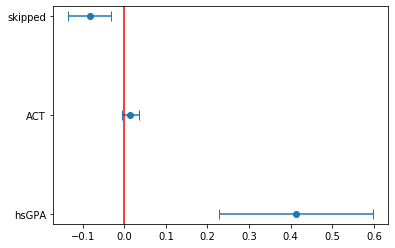

In [17]:
coef = res_gpa.params  #  推定値
varname = coef.index  # 変数名
ci = res_gpa.conf_int()  # 信頼区間を　ci　に入れる
error = ci.iloc[:,1]-coef  # 信頼区間の幅の半分

plt.errorbar(x=coef[1:], y=varname[1:], xerr=error[1:], fmt='o',capsize=5)  # 切片以外のエラーバー
plt.axvline(0, color='red')  # 垂直線
pass

In [18]:
mlb1 = wooldridge.data('mlb1')
wooldridge.data('mlb1',description=True)

name of dataset: mlb1
no of variables: 47
no of observations: 353

+----------+----------------------------+
| variable | label                      |
+----------+----------------------------+
| salary   | 1993 season salary         |
| teamsal  | team payroll               |
| nl       | =1 if national league      |
| years    | years in major leagues     |
| games    | career games played        |
| atbats   | career at bats             |
| runs     | career runs scored         |
| hits     | career hits                |
| doubles  | career doubles             |
| triples  | career triples             |
| hruns    | career home runs           |
| rbis     | career runs batted in      |
| bavg     | career batting average     |
| bb       | career walks               |
| so       | career strike outs         |
| sbases   | career stolen bases        |
| fldperc  | career fielding perc       |
| frstbase | = 1 if first base          |
| scndbase | =1 if second base          |
| shrtsto

In [19]:
formula_0 = 'np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr'
res_0 = ols(formula_0, data=mlb1).fit()

In [20]:
formula_1 = 'np.log(salary) ~ years + gamesyr'
res_1 = ols(formula_1, data=mlb1).fit()

In [21]:
# 決定係数
r2_0 = res_0.rsquared
r2_1 = res_1.rsquared

n = res_0.nobs  # 標本の大きさ
k = res_0.df_model  # 定数項以外の説明変数の数
q = 3  # 制約式の数

# F値:
F = (r2_0 - r2_1) / (1 - r2_0) * (n - k - 1) / q
F

9.55025352195195

In [22]:
a = 0.05
f.ppf(1-a, dfn=q, dfd=n-k-1)   # f.ppfについてはscipy.statsを参照

2.6306414891156504

In [23]:
1-f.cdf(F, dfn=q, dfd=n-k-1)

4.473708139829391e-06

In [24]:
hypotheses = 'bavg = 0, hrunsyr = 0, rbisyr = 0'

In [25]:
res_f_test = res_0.f_test(hypotheses)

In [26]:
res_f_test.summary()

'<F test: F=array([[9.55025352]]), p=4.4737081398389455e-06, df_denom=347, df_num=3>'

In [27]:
res_0.fvalue

117.0603200852145

In [28]:
res_0.f_pvalue

2.9380422932206435e-72

In [29]:
print(res_0.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     117.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.94e-72
Time:                        12:00:00   Log-Likelihood:                -385.11
No. Observations:                 353   AIC:                             782.2
Df Residuals:                     347   BIC:                             805.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1924      0.289     38.752      0.0